# Comparative Analysis & Visualization

This notebook conducts a comparative analysis of selected ICT Access indicators
across a group of countries. The objective is to identify disparities, trends,
and structural differences relevant to school connectivity under the GIGA initiative.

## Scope of the Notebook

This notebook focuses on:
- Loading cleaned Access indicators
- Comparing trends across countries
- Visualizing disparities in access and infrastructure
- Highlighting insights relevant to school connectivity

In [41]:
# =============================
# Import libraries
# =============================
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [42]:
# =============================
# Define data directory
# =============================
DATA_DIR = Path("../data/processed")

In [43]:
# =============================
# Load cleaned Access indicators
# =============================
hh_internet = pd.read_csv(DATA_DIR / "households_with_internet_access_at_home.csv")
fixed_broadband = pd.read_csv(DATA_DIR / "fixed_broadband_subscriptions.csv")
active_mobile_bb = pd.read_csv(DATA_DIR / "active_mobile_broadband_subscriptions.csv")
pop_coverage_mobile = pd.read_csv(DATA_DIR / "population_coverage_by_mobile_network_technology.csv")

In [44]:
# =============================
# Basic data validation
# =============================
datasets = {
    "Households with Internet access": hh_internet,
    "Fixed broadband subscriptions": fixed_broadband,
    "Active mobile broadband": active_mobile_bb,
    "Population coverage mobile": pop_coverage_mobile
}

for name, df in datasets.items():
    print(f"{name}:")
    display(df.describe(include="all"))

Households with Internet access:


,country,iso3,year,value
count,117,117,117.000000,117.000000
unique,6,6,NaN,NaN
top,Chile,CHL,NaN,NaN
freq,24,24,NaN,NaN
mean,NaN,NaN,2012.094017,38.712693
std,NaN,NaN,6.512565,30.683340
min,NaN,NaN,2000.000000,0.223920
25%,NaN,NaN,2007.000000,10.000000
50%,NaN,NaN,2012.000000,34.350000
75%,NaN,NaN,2017.000000,66.200000


Fixed broadband subscriptions:


,country,iso3,year,value
count,264,264,264.000000,2.640000e+02
unique,6,6,NaN,NaN
top,Chile,CHL,NaN,NaN
freq,50,50,NaN,NaN
mean,NaN,NaN,2012.613636,3.878330e+06
std,NaN,NaN,6.823854,9.132522e+06
min,NaN,NaN,2000.000000,4.638660e-03
25%,NaN,NaN,2007.000000,5.029930e+00
50%,NaN,NaN,2013.000000,7.115396e+02
75%,NaN,NaN,2019.000000,2.347430e+06


Active mobile broadband:


,country,iso3,year,value
count,162,162,162.000000,1.560000e+02
unique,6,6,NaN,NaN
top,Brazil,BRA,NaN,NaN
freq,34,34,NaN,NaN
mean,NaN,NaN,2016.444444,6.096578e+07
std,NaN,NaN,4.625073,1.617191e+08
min,NaN,NaN,2008.000000,9.320860e-01
25%,NaN,NaN,2012.000000,5.606652e+01
50%,NaN,NaN,2016.000000,1.056542e+04
75%,NaN,NaN,2020.000000,3.255652e+07


Population coverage mobile:


,country,iso3,year,value
count,269,269,269.000000,261.000000
unique,6,6,NaN,NaN
top,South Africa,ZAF,NaN,NaN
freq,56,56,NaN,NaN
mean,NaN,NaN,2015.992565,82.300230
std,NaN,NaN,6.090115,27.465875
min,NaN,NaN,2000.000000,0.080000
25%,NaN,NaN,2013.000000,82.150000
50%,NaN,NaN,2017.000000,95.000000
75%,NaN,NaN,2021.000000,99.000000


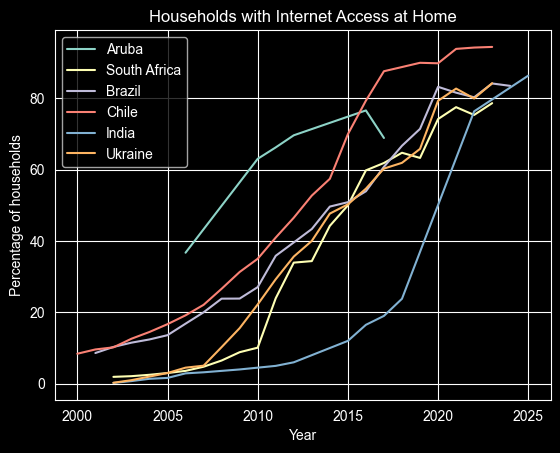

In [45]:
# =============================
# Trend: Households with Internet access
# =============================
plt.figure()

for country in hh_internet["country"].unique():
    country_df = hh_internet[hh_internet["country"] == country]
    plt.plot(country_df["year"], country_df["value"], label=country)

plt.xlabel("Year")
plt.ylabel("Percentage of households")
plt.title("Households with Internet Access at Home")
plt.legend()
plt.show()

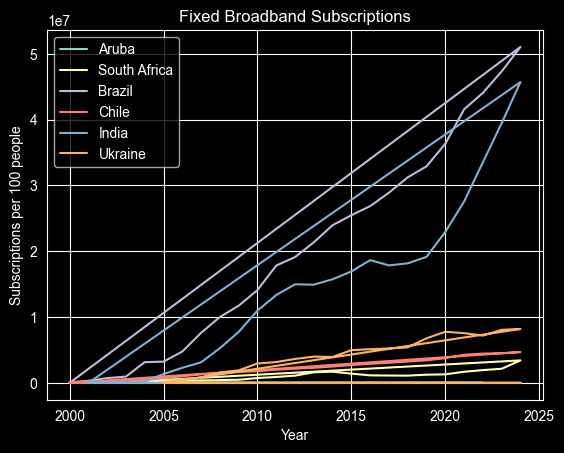

In [46]:
# =============================
# Fixed broadband comparison
# =============================
plt.figure()

for country in fixed_broadband["country"].unique():
    country_df = fixed_broadband[fixed_broadband["country"] == country]
    plt.plot(country_df["year"], country_df["value"], label=country)

plt.xlabel("Year")
plt.ylabel("Subscriptions per 100 people")
plt.title("Fixed Broadband Subscriptions")
plt.legend()
plt.show()

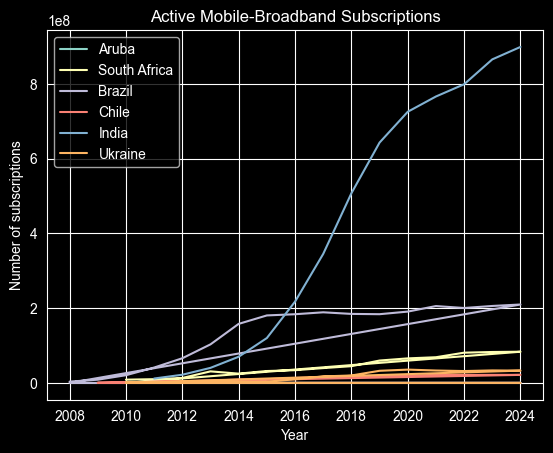

In [47]:
# =============================
# Active mobile broadband trends
# =============================
plt.figure()

for country in active_mobile_bb["country"].unique():
    country_df = active_mobile_bb[active_mobile_bb["country"] == country]
    plt.plot(country_df["year"], country_df["value"], label=country)

plt.xlabel("Year")
plt.ylabel("Number of subscriptions")
plt.title("Active Mobile-Broadband Subscriptions")
plt.legend()
plt.show()

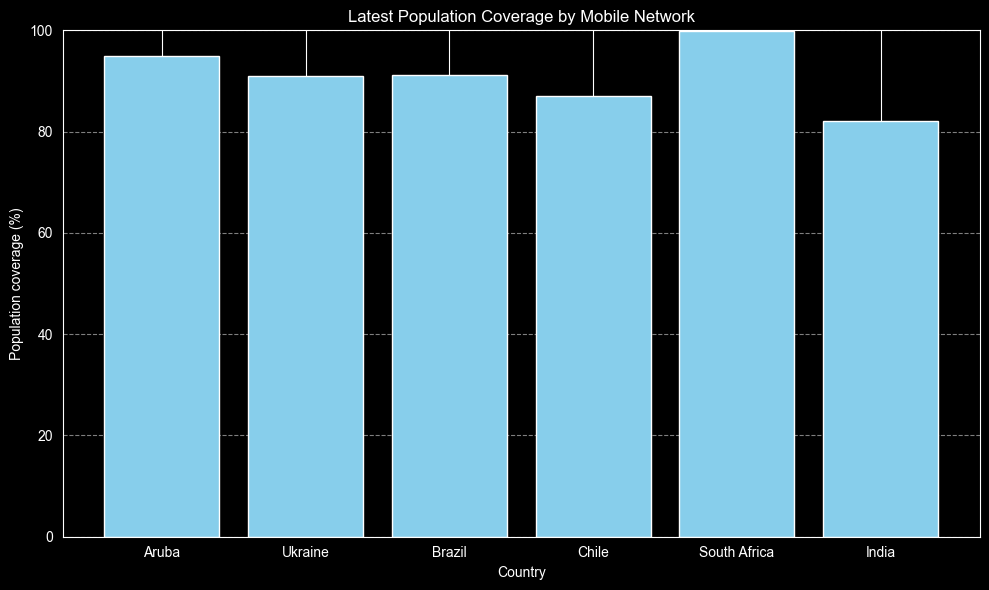

In [48]:
# =============================
# Population coverage trends
# =============================

# Replace 0 with NaN to ignore missing coverage
pop_coverage_mobile['value'] = pop_coverage_mobile['value'].replace(0, np.nan)

# Take the last available year for each country
latest_data = pop_coverage_mobile.sort_values('year').groupby('country').tail(1)

plt.figure(figsize=(10,6))
plt.bar(latest_data['country'], latest_data['value'], color='skyblue')
plt.xlabel("Country")
plt.ylabel("Population coverage (%)")
plt.title("Latest Population Coverage by Mobile Network")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Cross-Indicator Insights

Comparing multiple indicators reveals that:
- Network availability does not always translate into adoption
- Mobile connectivity can partially offset limited fixed infrastructure
- Countries follow distinct connectivity development paths


## Relevance for GIGA and School Connectivity

The observed disparities underline the importance of:
- Country-specific connectivity strategies
- Infrastructure investment aligned with education needs
- Complementary use of fixed and mobile technologies

## Notebook Summary

This notebook provided a comparative analysis of key ICT Access indicators.
The results offer evidence-based insights relevant for assessing
school connectivity readiness within the GIGA framework.
